In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
# loop through ./data/joined_dataframe, only work with csv files
dirname = os.path.join(os.getcwd(), 'data', 'joined_dataframe')
ext = ('.csv')

files = []
for file in os.listdir(dirname):
    if file.endswith(ext):
        files.append(file)
    else:
        continue
files

['part-00010-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00007-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00011-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00006-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00012-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00009-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00005-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00013-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00008-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00004-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00003-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00014-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00018-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00002-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00015-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00019-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00001-146356b5-8c

# **data processing**

In [2]:
vars_to_test = ['age', 
                
                'colour_group_name_black', 'colour_group_name_blue',
                'colour_group_name_dark_blue', 'colour_group_name_dark_grey',
                'colour_group_name_dark_pink', 'colour_group_name_dark_red',
                'colour_group_name_gold', 'colour_group_name_grey',
                'colour_group_name_greyish_beige', 'colour_group_name_light_beige',
                'colour_group_name_light_blue', 'colour_group_name_light_grey',
                'colour_group_name_light_orange', 'colour_group_name_light_pink',
                'colour_group_name_light_turquoise', 'colour_group_name_off_white',
                'colour_group_name_pink', 'colour_group_name_silver',
                'colour_group_name_white', 'colour_group_name_yellow',
                'colour_group_name_yellowish_brown',
                
                'product_group_name_accessories',
                'product_group_name_garment_lower_body',
                'product_group_name_garment_upper_body', 'product_group_name_items',
                'product_group_name_nightwear', 'product_group_name_socks_tights',
                'product_group_name_underwear', 'product_group_name_unknown',
                
                'club_member_status_active',
                'sales_channel_id']

In [4]:
total_sales_dict = {}
full_pcts_dict = {}

for f in files:
    
    df = pd.read_csv(os.path.join(dirname, f))

    # convert t_dat to datetime
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    
    
    for varname in vars_to_test:
        # count purchased items grouped by month and vname
        tdf = df.groupby([df['t_dat'].dt.month, varname]).count()
        
        # get list of unique index values
        ivals = list(tdf.index.get_level_values(1).unique())
        
        # count total sales volume by month
        total_sales = tdf['price'].groupby(level=[0]).sum()
        if varname not in total_sales_dict:
            total_sales_dict[varname] = total_sales
        else:
            total_sales_dict[varname] = total_sales_dict[varname].add(total_sales)
        
        inner_pcts_dict = {}
        for i in ivals:
            # count filtered sales volume per month
            pcts = (tdf['price'].loc[tdf.index.get_level_values(varname) == i])# / total_sales
            inner_pcts_dict[i] = pcts
        
        if varname not in full_pcts_dict:
            full_pcts_dict[varname] = inner_pcts_dict
        else:
            for i in inner_pcts_dict:
                if i not in full_pcts_dict[varname]:
                    full_pcts_dict[varname][i] = inner_pcts_dict[i]
                else:
                    full_pcts_dict[varname][i] = full_pcts_dict[varname][i].add(inner_pcts_dict[i])
            
        # print(f'   {varname} processed.')
    print(f'{f} processed.')

part-00010-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00007-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00011-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00006-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00012-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00009-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00005-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00013-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00008-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00004-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00003-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00014-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00018-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00002-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv processed.
part-00015-146356b5-8cfc-4f8a-a92b-15c0a28fb870-

# **colors**

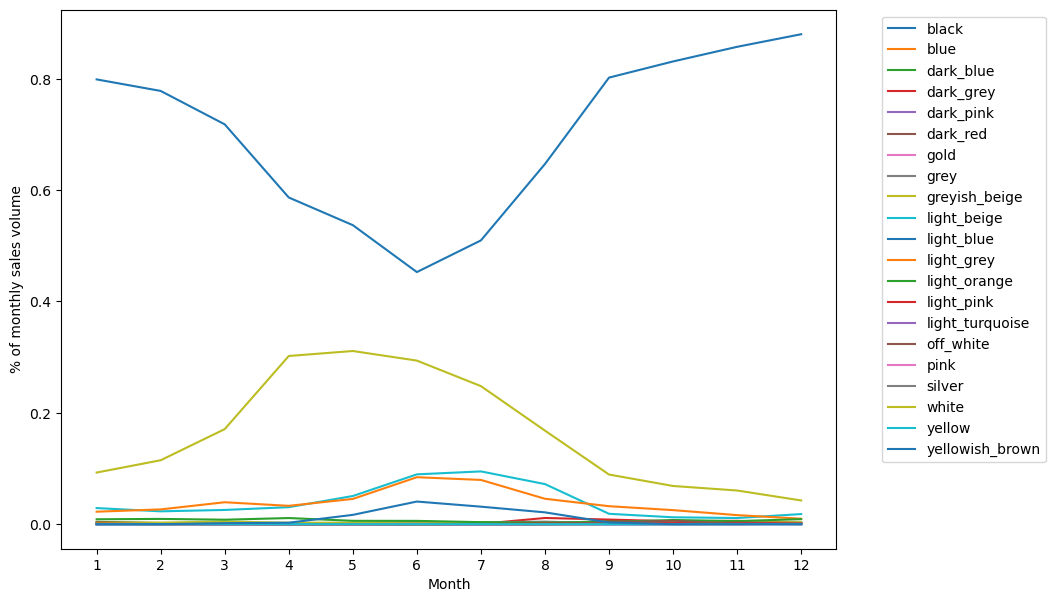

In [14]:
# plot colors demand
colors = ['colour_group_name_black', 'colour_group_name_blue',
       'colour_group_name_dark_blue', 'colour_group_name_dark_grey',
       'colour_group_name_dark_pink', 'colour_group_name_dark_red',
       'colour_group_name_gold', 'colour_group_name_grey',
       'colour_group_name_greyish_beige', 'colour_group_name_light_beige',
       'colour_group_name_light_blue', 'colour_group_name_light_grey',
       'colour_group_name_light_orange', 'colour_group_name_light_pink',
       'colour_group_name_light_turquoise', 'colour_group_name_off_white',
       'colour_group_name_pink', 'colour_group_name_silver',
       'colour_group_name_white', 'colour_group_name_yellow',
       'colour_group_name_yellowish_brown']

for c in colors:
    color_name = c[18:]
    pcts = full_pcts_dict[c][0].values / total_sales_dict[c].values
    plt.plot(range(1, 13),
             (1 - pcts),
             label=f'{color_name}')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # moves legend outside the figure
plt.xlabel('Month')
plt.ylabel('% of monthly sales volume')
plt.xticks(range(1, 13));

# **age**

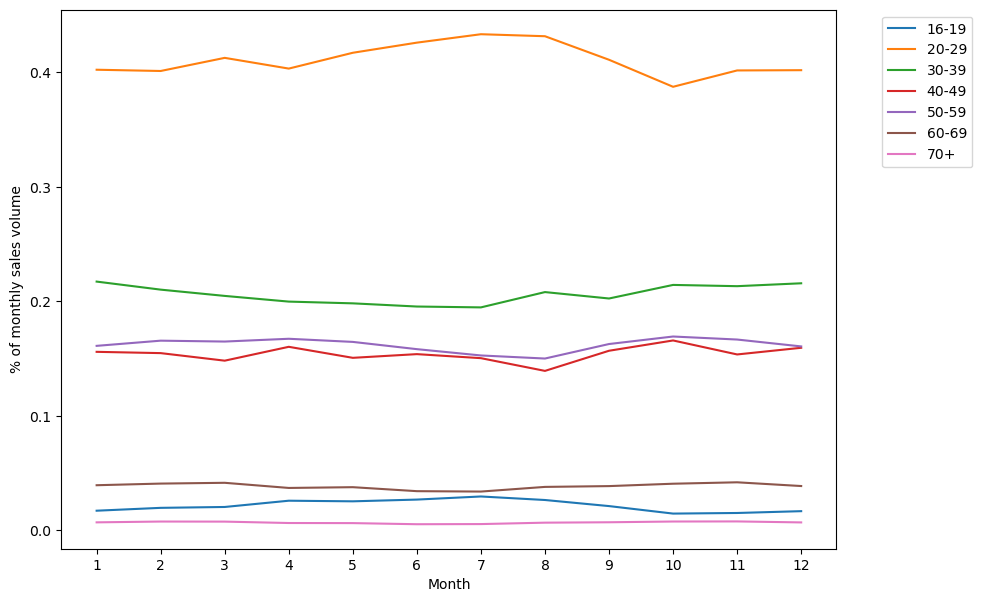

In [15]:
# filter age into buckets
age_cutoffs = [19, 29, 39, 49, 59, 69, 100]

buckets = {'16-19': [],
           '20-29': [],
           '30-39': [],
           '40-49': [],
           '50-59': [],
           '60-69': [],
           '70+': []
            }

# bucket age percentages
for age in full_pcts_dict['age']:
    for i in range(len(age_cutoffs)):
        if age <= age_cutoffs[i]:
            buckets[list(buckets.keys())[i]].append(full_pcts_dict['age'][age])
            break
        
# within each bucket, sum up the percentages to get the bucket percentage
for b in buckets:
    dfs = buckets[b]
    d = dfs[0].droplevel(1)
    for i in range(1, len(dfs)):
        d = d.add(dfs[i].droplevel(1), fill_value=0)
    d = d / total_sales_dict['age']
    plt.plot(range(1, 13), d, label=f'{b}')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Month')
plt.ylabel('% of monthly sales volume')
plt.xticks(range(1, 13));

# **product group**

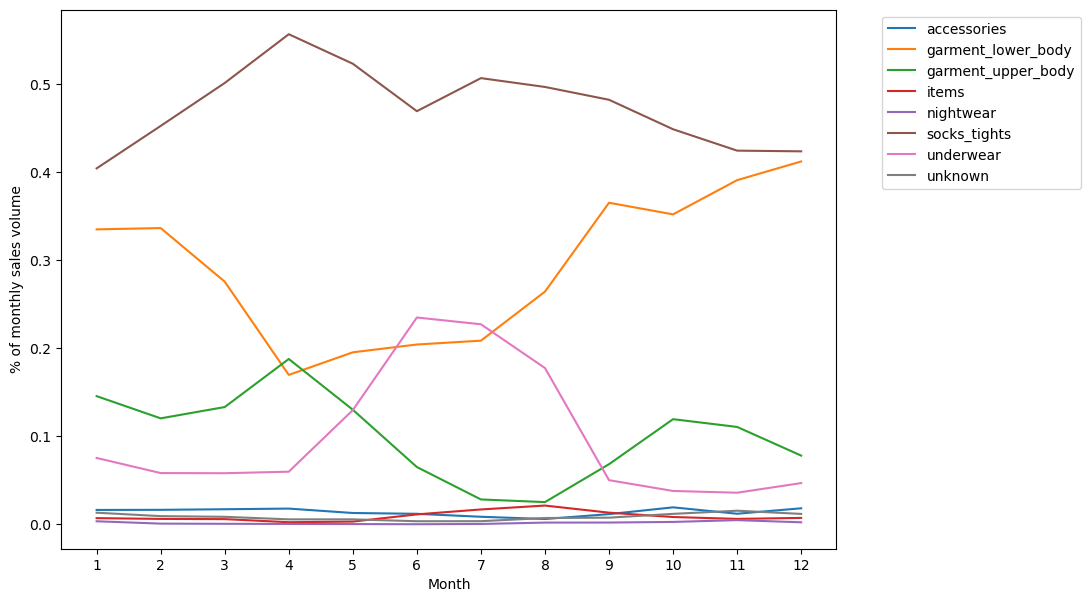

In [16]:
# plot colors demand
product_group = ['product_group_name_accessories',
       'product_group_name_garment_lower_body',
       'product_group_name_garment_upper_body', 'product_group_name_items',
       'product_group_name_nightwear', 'product_group_name_socks_tights',
       'product_group_name_underwear', 'product_group_name_unknown']

for p in product_group:
    product_group_name = p[19:]
    pcts = full_pcts_dict[p][0].values / total_sales_dict[p].values
    plt.plot(range(1, 13),
             (1 - pcts),
             label=f'{product_group_name}')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Month')
plt.ylabel('% of monthly sales volume')
plt.xticks(range(1, 13));

# **active**

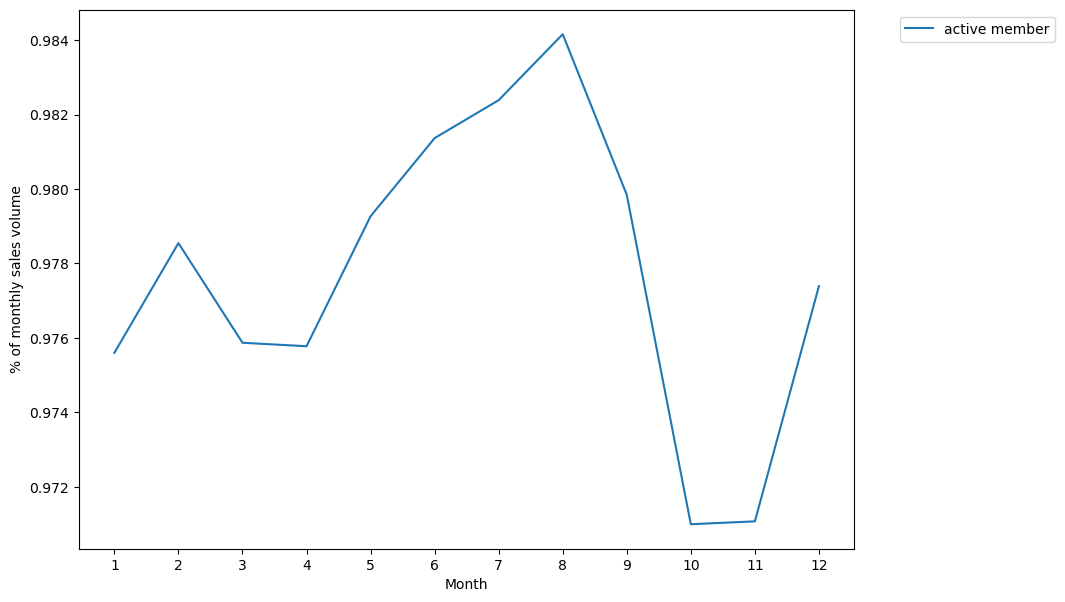

In [17]:
active_pcts = full_pcts_dict['club_member_status_active'][0].values / total_sales_dict['club_member_status_active'].values
plt.plot(range(1, 13), (1 - active_pcts), label=f'active member')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Month')
plt.ylabel('% of monthly sales volume')
plt.xticks(range(1, 13));

# **sales channel**

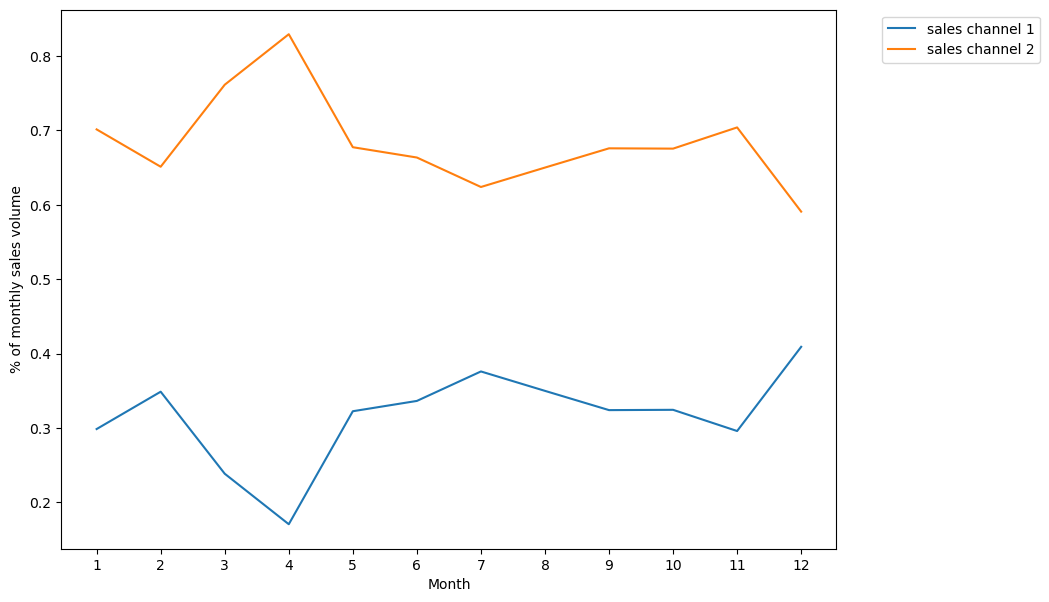

In [18]:
sales_pcts1 = full_pcts_dict['sales_channel_id'][1].values / total_sales_dict['sales_channel_id'].values
sales_pcts2 = full_pcts_dict['sales_channel_id'][2].values / total_sales_dict['sales_channel_id'].values

plt.plot(range(1, 13), sales_pcts1, label=f'sales channel 1')
plt.plot(range(1, 13), sales_pcts2, label=f'sales channel 2')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Month')
plt.ylabel('% of monthly sales volume')
plt.xticks(range(1, 13));